In [162]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from dython.nominal import associations

sns.set_style("darkgrid")

df = pd.read_csv("../dataset/diabetes.csv")
df = df.drop_duplicates()
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [163]:
# Basic Informations about DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [164]:
# Unique Values each Column in DataFrame

unique_values = {col: df[col].nunique() for col in df.columns}

for i, (col, unique_count) in enumerate(unique_values.items()):
    print(f"{i}: {col}: {unique_count} unique values")

0: gender: 3 unique values
1: age: 102 unique values
2: hypertension: 2 unique values
3: heart_disease: 2 unique values
4: smoking_history: 6 unique values
5: bmi: 4247 unique values
6: HbA1c_level: 18 unique values
7: blood_glucose_level: 18 unique values
8: diabetes: 2 unique values


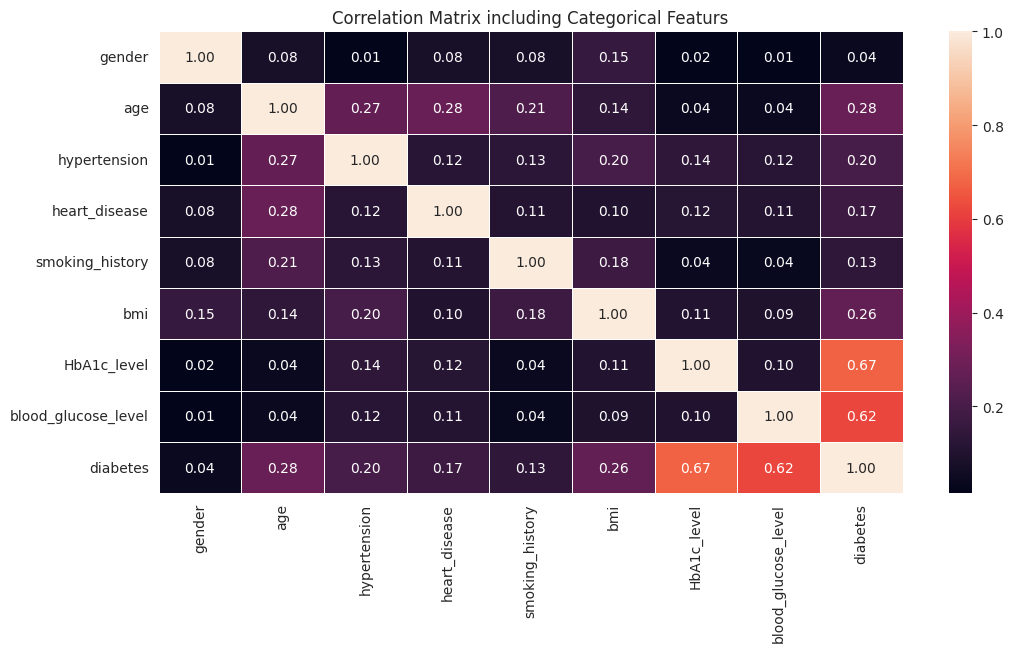

In [165]:
asso_df = associations(df, nominal_columns="all", plot=False)
corr_matrix = asso_df["corr"]
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix including Categorical Featurs")
plt.show()

In [166]:
# handle outliers in dataframe

num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].apply(
    lambda x: x.clip(*x.quantile([0.05, 0.95]))
)

df = df.drop_duplicates()

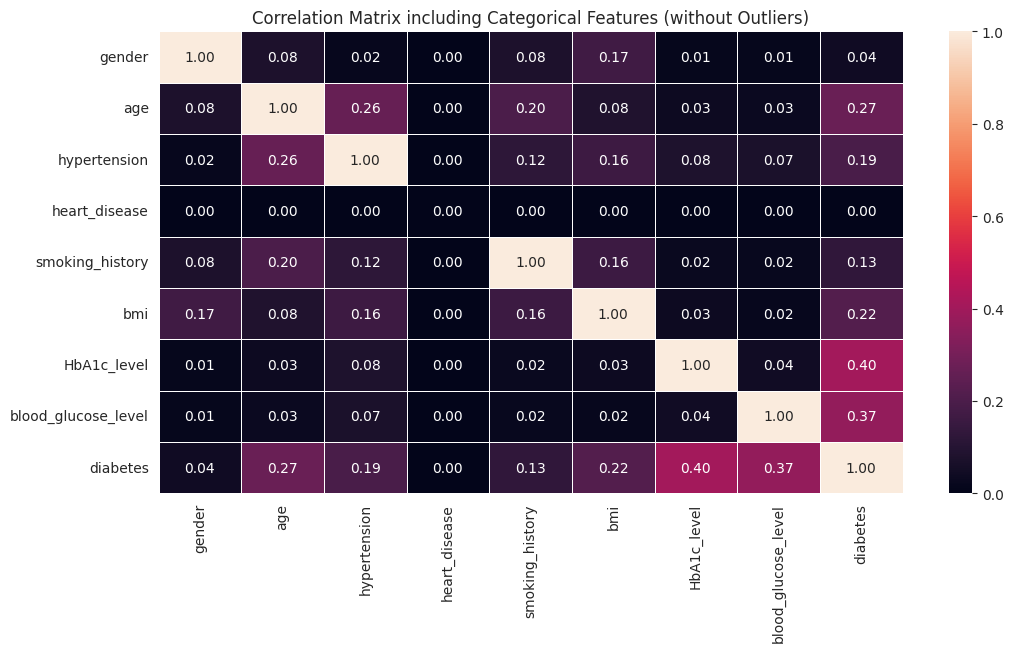

In [167]:
asso_df = associations(df, nominal_columns="all", plot=False)
corr_matrix = asso_df["corr"]
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix including Categorical Features (without Outliers)")
plt.show()

In [168]:
# Gender Balance in Dataset

df["gender"].value_counts()

gender
Female    54466
Male      38476
Other        18
Name: count, dtype: int64

In [169]:
# Drop "Other" in gender

i = df[df["gender"] == "Other"].index 
df = df.drop(i)
df["gender"].value_counts()

gender
Female    54466
Male      38476
Name: count, dtype: int64

In [170]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,0,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,0,current,20.14,4.8,155,0


In [171]:
# Target Balance in Dataset

df["diabetes"].value_counts()

diabetes
0    84724
1     8218
Name: count, dtype: int64

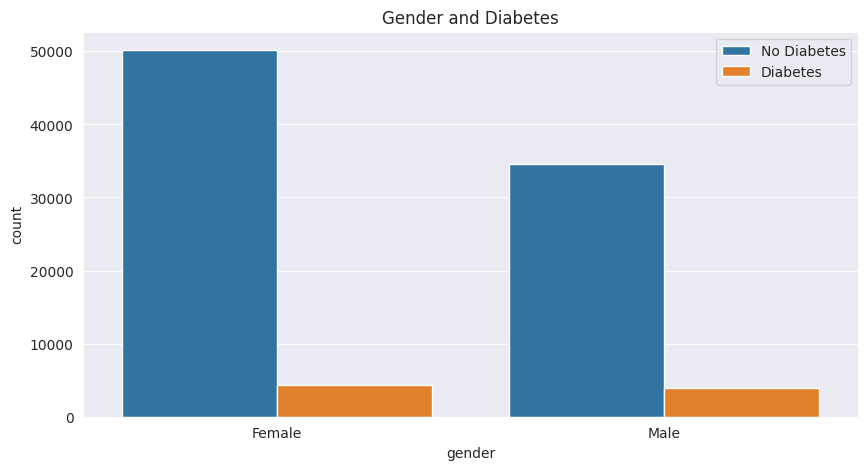

In [172]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="gender", hue="diabetes", data=df)
plt.title("Gender and Diabetes")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Diabetes", "Diabetes"])
plt.show()

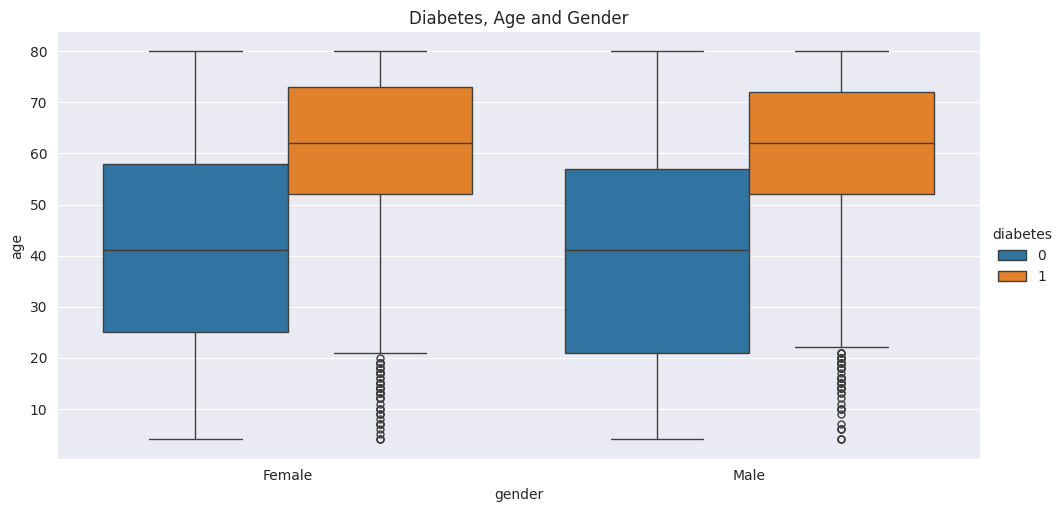

In [173]:
ax = sns.catplot(x="gender", y="age", hue="diabetes", data=df, kind="box", height=5, aspect=2)
plt.title("Diabetes, Age and Gender")
plt.show()

In [174]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,0,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,0,current,20.14,4.8,155,0


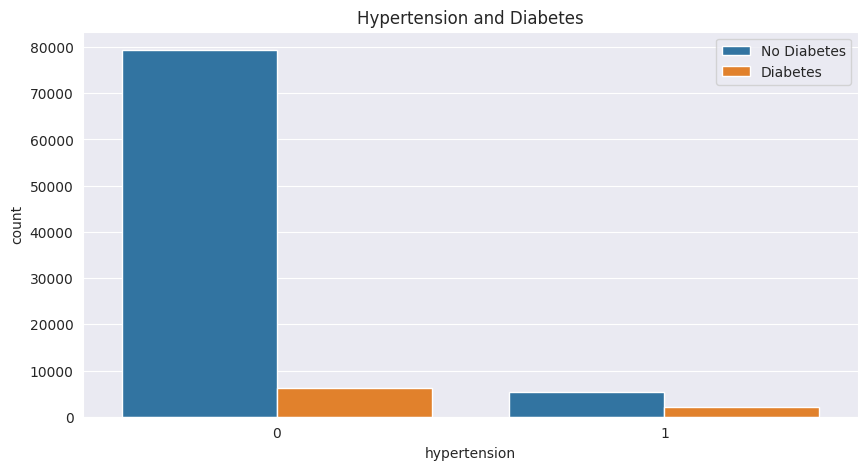

In [175]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="hypertension", hue="diabetes", data=df)
plt.title("Hypertension and Diabetes")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Diabetes", "Diabetes"])
plt.show()

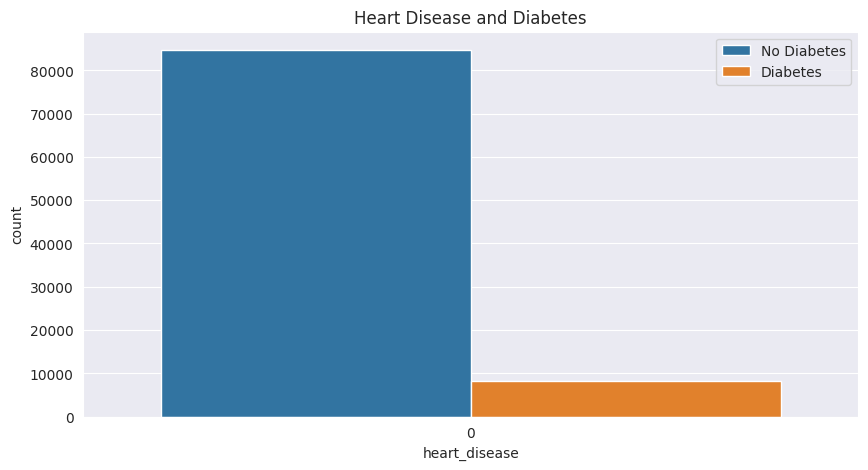

In [176]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="heart_disease", hue="diabetes", data=df)
plt.title("Heart Disease and Diabetes")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Diabetes", "Diabetes"])
plt.show()

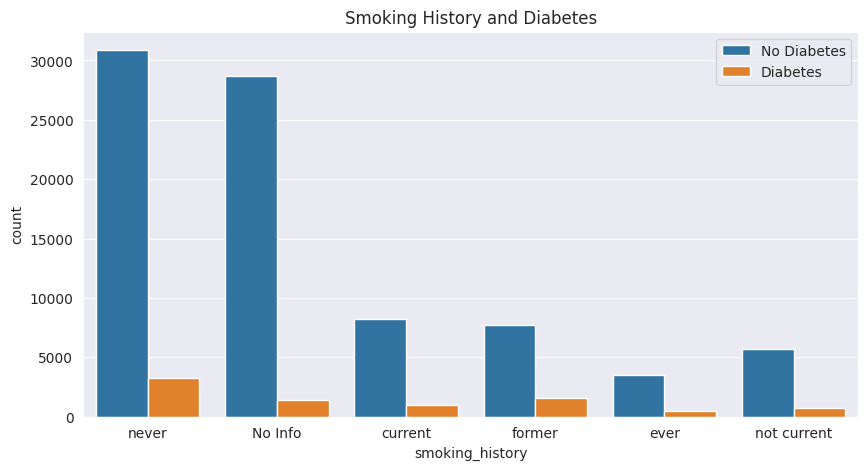

In [177]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="smoking_history", hue="diabetes", data=df)
plt.title("Smoking History and Diabetes")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Diabetes", "Diabetes"])
plt.show()

In [178]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,0,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,0,current,20.14,4.8,155,0


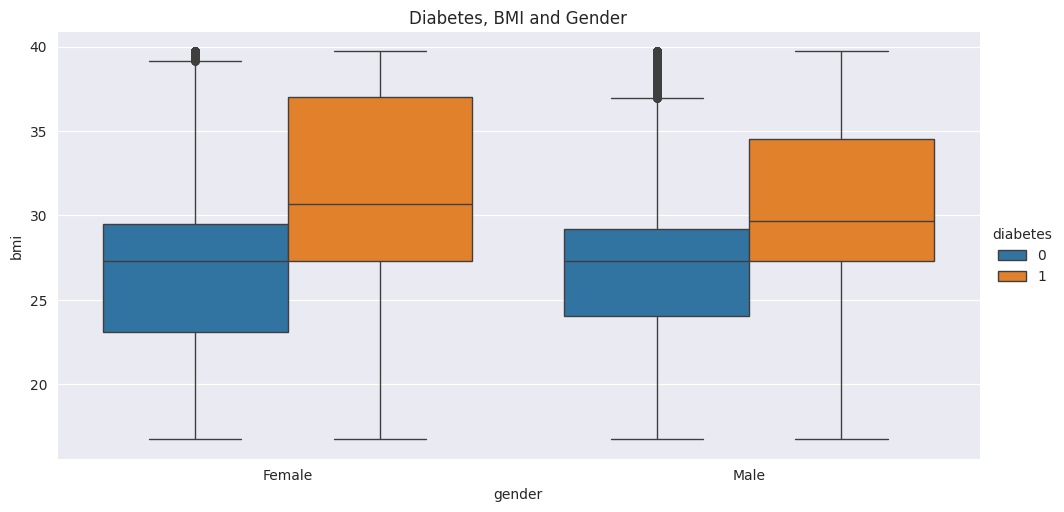

In [179]:
ax = sns.catplot(x="gender", y="bmi", hue="diabetes", data=df, kind="box", height=5, aspect=2)
plt.title("Diabetes, BMI and Gender")
plt.show()

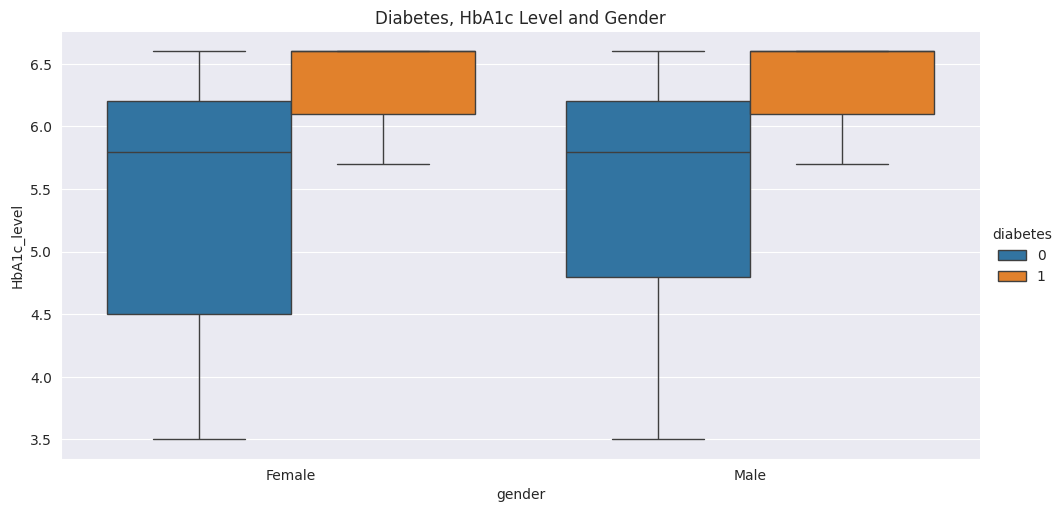

In [180]:
g = sns.catplot(x="gender", y="HbA1c_level", hue="diabetes", data=df, kind="box", height=5, aspect=2)
plt.title("Diabetes, HbA1c Level and Gender")
plt.show()

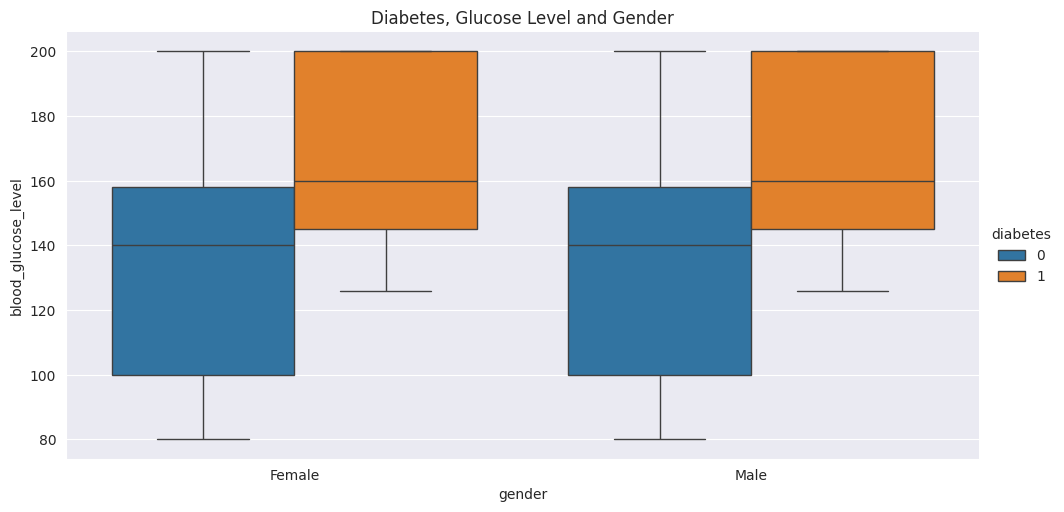

In [181]:
ax = sns.catplot(x="gender", y="blood_glucose_level", hue="diabetes", data=df, kind="box", height=5, aspect=2)
plt.title("Diabetes, Glucose Level and Gender")
plt.show()

In [182]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,0,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,0,current,20.14,4.8,155,0


In [183]:
df = df.sample(frac=1, random_state=42)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
67797,Female,65.0,0,0,former,27.21,6.6,85,0
67144,Female,34.0,0,0,former,32.60,6.2,158,0
88810,Female,53.0,0,0,never,22.65,6.2,145,0
62075,Female,51.0,0,0,never,20.90,5.0,126,0
98355,Female,58.0,0,0,not current,27.32,6.6,145,1


In [184]:
from sklearn.model_selection import train_test_split 

X = df.drop("diabetes", axis=1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(74353, 18589, 74353, 18589)

In [185]:
# around 9% is Diabetes in y_test

y_test.value_counts()

diabetes
0    16950
1     1639
Name: count, dtype: int64

In [186]:
# around 9% is Diabetes in y_train

y_train.value_counts()

diabetes
0    67774
1     6579
Name: count, dtype: int64

In [187]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
20983,Female,8.0,0,0,No Info,19.34,4.0,158
14760,Male,26.0,0,0,never,27.32,6.1,126
8827,Female,54.0,0,0,ever,17.61,4.8,155
99544,Female,66.0,0,0,No Info,24.00,4.5,85
10151,Female,41.0,0,0,No Info,27.32,6.0,160


In [188]:
X_train["diabetes"] = y_train 
X_train.to_csv("../dataset/diabetes_train.csv", index=False)
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
20983,Female,8.0,0,0,No Info,19.34,4.0,158,0
14760,Male,26.0,0,0,never,27.32,6.1,126,0
8827,Female,54.0,0,0,ever,17.61,4.8,155,0
99544,Female,66.0,0,0,No Info,24.00,4.5,85,0
10151,Female,41.0,0,0,No Info,27.32,6.0,160,0


In [189]:
X_test["diabetes"] = y_test 
X_test.to_csv("../dataset/diabetes_test.csv", index=False)
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
26724,Female,41.0,0,0,never,21.47,3.5,85,0
11568,Male,65.0,0,0,ever,37.56,5.0,130,0
75976,Female,71.0,0,0,never,39.71,6.5,155,0
34440,Male,21.0,0,0,never,21.03,5.0,155,0
6702,Male,41.0,0,0,former,29.81,4.8,155,0


In [190]:
from sklearn.preprocessing import LabelEncoder 

categorical_cols = X_train.select_dtypes(include=["object"]).columns
categorical_cols

Index(['gender', 'smoking_history'], dtype='object')

In [191]:
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

X_train.to_csv("../dataset/diabetes_train_usable.csv", index=False)

In [192]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
20983,0,8.0,0,0,0,19.34,4.0,158,0
14760,1,26.0,0,0,4,27.32,6.1,126,0
8827,0,54.0,0,0,2,17.61,4.8,155,0
99544,0,66.0,0,0,0,24.00,4.5,85,0
10151,0,41.0,0,0,0,27.32,6.0,160,0


In [193]:
for col in categorical_cols:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

X_test.to_csv("../dataset/diabetes_test_usable.csv", index=False)

In [194]:
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
26724,0,41.0,0,0,4,21.47,3.5,85,0
11568,1,65.0,0,0,2,37.56,5.0,130,0
75976,0,71.0,0,0,4,39.71,6.5,155,0
34440,1,21.0,0,0,4,21.03,5.0,155,0
6702,1,41.0,0,0,3,29.81,4.8,155,0
